In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### This notebook was created to visualize homoplasic Single Nucleotide Variants using the t-SNE embeddings derived from the pairwise SNP distance matrix

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
import itertools

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load SNP genotype matrix and Annotation Files

In [3]:
#load isolate annotation file (columns of Genotype Matrix)
isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/Genotype_Filtered_2/genotypes_isolate_annotation.pkl')

#load SNP annotation file (rows of Genotype Matrix) with gene annotation information
SNP_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/Genotype_Filtered_2/genotypes_SNP_annotation.pkl')

#load Genotypes Matrix
genotypes_array =  np.load('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/Genotype_Filtered_2/genotypes_matrix.npy')

In [4]:
allele_code_map_dict = {'A':0 , 'C':1 , 'G':2 , 'T':3}
allele_code_map_dict_r = {0:'A' , 1:'C' , 2:'G' , 3:'T'}

In [5]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,isolate_ID
0,3,1,1,NaN,NaN,SAMN03647419
1,1,1,3,NaN,NaN,SAMN07659096
2,4,1,1,NaN,NaN,SAMEA1119683
3,2,2,1,NaN,NaN,SAMN05576173
4,2,2,1,NaN,NaN,SAMN08612836


In [6]:
np.shape(isolate_annotation_DF)

(20352, 6)

In [7]:
SNP_annotation_DF.head()

,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
0,29,C,[G],[Rv0001],[28],[Essential],[dnaA]
1,31,A,"[C, G]",[Rv0001],[30],[Essential],[dnaA]
2,48,C,[T],[Rv0001],[47],[Essential],[dnaA]
3,64,G,[C],[Rv0001],[63],[Essential],[dnaA]
4,71,C,[T],[Rv0001],[70],[Essential],[dnaA]


In [8]:
np.shape(SNP_annotation_DF)

(128898, 7)

In [9]:
np.shape(genotypes_array)

(128898, 20352)

## t-SNE

Import t-SNE embeddings
- perplex = 175
- lr = 1500

In [10]:
t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/tb_output/tSNE_embeddings_from_pairwise_SNP_dist_perplexity175_lr1500.txt')

In [11]:
t_SNE_coords

array([[-61.03228378, -29.65120888],
       [-11.61335945, -10.58242035],
       [ 34.16015625,  39.21244049],
       ...,
       [ 14.36263657,  20.88393784],
       [  3.52293229, -51.53728485],
       [-12.19015884,  29.60659409]])

In [12]:
np.shape(t_SNE_coords)

(20352, 2)

### *Function* to plot den-SNE & label isolates with a mutant allele

In [13]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 9})
plt.rc('font', family='serif')

In [14]:
def t_SNE_label_isolates_with_SNP(pos_i , mut_allele , SNP_label , fig , ax):
    
    #Get Genotypes for SNP
    #get row index of genotypes matrix that corresponds to this row
    SNP_site_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == pos_i].index.values[0]

    #get the genotypes for all isolates
    SNP_site_genotypes = genotypes_array[SNP_site_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = SNP_site_genotypes == allele_code_map_dict[mut_allele]

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = SNP_site_genotypes != allele_code_map_dict[mut_allele]
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.15 , alpha = 0.40 , s = 13)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.15 , alpha = 1.0 , s = 13)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates, other_isolates), (SNP_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.01)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

#### Load the table of in-host SNPs that were detected to be *phylogentically convergent*

In [15]:
phy_conv_in_host_SNPs = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/CSV_files/rolling_DB_scrape/SNPs_in_multiple_global_lineages.csv')
phy_conv_in_host_SNPs = phy_conv_in_host_SNPs.loc[: , ['ref_position_and_alt_allele' , 'ref_position' , 'genomic_coord' , 'ref_allele' , 'alt_allele' , 'gene_id' , 'Gene_Category' , 'symbol' , 'SNP_type' , 'AA_change']]

In [16]:
phy_conv_in_host_SNPs.head()

,ref_position_and_alt_allele,ref_position,genomic_coord,ref_allele,alt_allele,gene_id,Gene_Category,symbol,SNP_type,AA_change
0,6742_C,6742,1503,A,C,Rv0005,Antibiotic Resistance,gyrB,N,E501D
1,7581_A,7581,280,G,A,Rv0006,Antibiotic Resistance,gyrA,N,D94N
2,7582_G,7582,281,A,G,Rv0006,Antibiotic Resistance,gyrA,N,D94G
3,105060_A,105060,156,G,A,Rv0095c,Non-Essential,Rv0095c,S,D52D
4,105063_A,105063,153,G,A,Rv0095c,Non-Essential,Rv0095c,S,F51F


#### Create the gene labels & the SNP labels for each mutation

In [17]:
#manually enter the gene symbols for the intergenic regions
phy_conv_in_host_SNPs.loc[13 , 'symbol'] = 'promoter fabG1-inhA'
phy_conv_in_host_SNPs.loc[16 , 'symbol'] = 'int Rv2828c_Rv2829c'
phy_conv_in_host_SNPs.loc[21 , 'symbol'] = 'promoter embA-embB'

In [18]:
#manually enter the SNP labels for the intergenic regions
phy_conv_in_host_SNPs.rename(columns={"AA_change": "SNP_label"} , inplace = True)
phy_conv_in_host_SNPs.loc[13 , 'SNP_label'] = phy_conv_in_host_SNPs.loc[13 , 'ref_allele'] + str(phy_conv_in_host_SNPs.loc[13 , 'ref_position']) + phy_conv_in_host_SNPs.loc[13 , 'alt_allele']
phy_conv_in_host_SNPs.loc[16 , 'SNP_label'] = phy_conv_in_host_SNPs.loc[16 , 'ref_allele'] + str(phy_conv_in_host_SNPs.loc[16 , 'ref_position']) + phy_conv_in_host_SNPs.loc[16 , 'alt_allele']
phy_conv_in_host_SNPs.loc[21 , 'SNP_label'] = phy_conv_in_host_SNPs.loc[21 , 'ref_allele'] + str(phy_conv_in_host_SNPs.loc[21 , 'ref_position']) + phy_conv_in_host_SNPs.loc[21 , 'alt_allele']

In [19]:
phy_conv_in_host_SNPs

,ref_position_and_alt_allele,ref_position,genomic_coord,ref_allele,alt_allele,gene_id,Gene_Category,symbol,SNP_type,SNP_label
0,6742_C,6742,1503,A,C,Rv0005,Antibiotic Resistance,gyrB,N,E501D
1,7581_A,7581,280,G,A,Rv0006,Antibiotic Resistance,gyrA,N,D94N
2,7582_G,7582,281,A,G,Rv0006,Antibiotic Resistance,gyrA,N,D94G
3,105060_A,105060,156,G,A,Rv0095c,Non-Essential,Rv0095c,S,D52D
4,105063_A,105063,153,G,A,Rv0095c,Non-Essential,Rv0095c,S,F51F
5,760314_T,760314,508,G,T,Rv0667,Antibiotic Resistance,rpoB,N,V170F
6,761139_G,761139,1333,C,G,Rv0667,Antibiotic Resistance,rpoB,N,H445D
7,761140_C,761140,1334,A,C,Rv0667,Antibiotic Resistance,rpoB,N,H445P
8,761277_T,761277,1471,A,T,Rv0667,Antibiotic Resistance,rpoB,N,I491F
9,764819_G,764819,1450,T,G,Rv0668,Antibiotic Resistance,rpoC,N,W484G


## Main Figure 7

#### SNP_indices: 2, 6, 12, 17, 18

/home/rv76/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/rv76/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


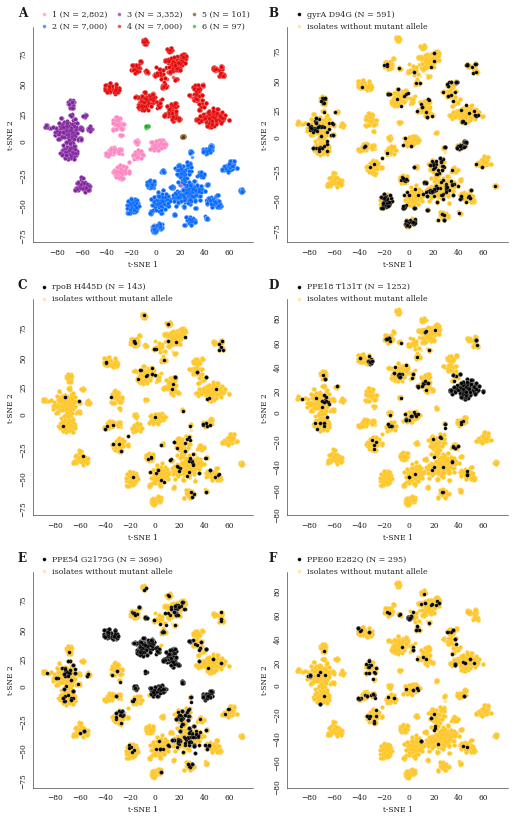

In [20]:
figM7 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=figM7 , wspace=0.155, hspace=0.265)
figM7_ax1 = figM7.add_subplot(spec2[0, 0])
figM7_ax2 = figM7.add_subplot(spec2[0, 1])
figM7_ax3 = figM7.add_subplot(spec2[1, 0])
figM7_ax4 = figM7.add_subplot(spec2[1, 1])
figM7_ax5 = figM7.add_subplot(spec2[2, 0])
figM7_ax6 = figM7.add_subplot(spec2[2, 1])

################################################################################################################
circ_size = 13
alpha = 0.65

#Modern 
#lineage 2 (N = 7,000)
L2 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

#lineage 4 (N = 7,000)
L4 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '4'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '4']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

#Ancestral
#lineage 3 (N = 3,352)
L3 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

#lineage 1 (N = 2,802)
L1 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '1']  , color = 'xkcd:pink' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

#lineage 5 (N = 101)
L5 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

#lineage 6 (N = 97)
L6 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = 0.15 , alpha = alpha , s = circ_size)

figM7_ax1.spines['right'].set_visible(False)
figM7_ax1.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figM7_ax1.spines[axis].set_linewidth(0.5)

figM7_ax1.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
figM7_ax1.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

#add legend
figM7_ax1.legend((L1, L2, L3, L4, L5, L6), ('1 (N = 2,802)', '2 (N = 7,000)', '3 (N = 3,352)', '4 (N = 7,000)', '5 (N = 101)', '6 (N = 97)') , bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=3, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)

#add axis labels
figM7_ax1.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
figM7_ax1.tick_params(axis='x', pad=0.0)

figM7_ax1.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
figM7_ax1.tick_params(axis='y', pad=0.0)
################################################################################################################

SNP_i_index = 2
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figM7 , figM7_ax2)

SNP_i_index = 6
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figM7 , figM7_ax3)

SNP_i_index = 12
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figM7 , figM7_ax4)

SNP_i_index = 17
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figM7 , figM7_ax5)

SNP_i_index = 18
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figM7 , figM7_ax6)


figM7.text(0.10, 0.89, 'A', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.89, 'B', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.10, 0.62, 'C', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.62, 'D', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.10, 0.35, 'E', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.35, 'F', fontsize=12 , fontweight='bold' , color = 'k')

figM7 = plt.gcf()
figM7.set_size_inches(8.5, 14.0)
figM7.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/SNP_homoplasy_tSNE_plots/Figure 7.tif'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()

## Supplementary Figure 10

In [21]:
def t_SNE_label_isolates_with_SNP(pos_i , mut_allele , SNP_label , fig , ax):
    
    #Get Genotypes for SNP
    #get row index of genotypes matrix that corresponds to this row
    SNP_site_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == pos_i].index.values[0]

    #get the genotypes for all isolates
    SNP_site_genotypes = genotypes_array[SNP_site_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = SNP_site_genotypes == allele_code_map_dict[mut_allele]

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = SNP_site_genotypes != allele_code_map_dict[mut_allele]
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.1 , alpha = 0.40 , s = 10.5)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.1 , alpha = 1.0 , s = 10.5)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.set_xticks([])
    ax.set_yticks([])

    #add legend
    ax.legend([mut_allele_isolates], [SNP_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')'], bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=6.5 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.01)

#### SNP_indices: 0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13

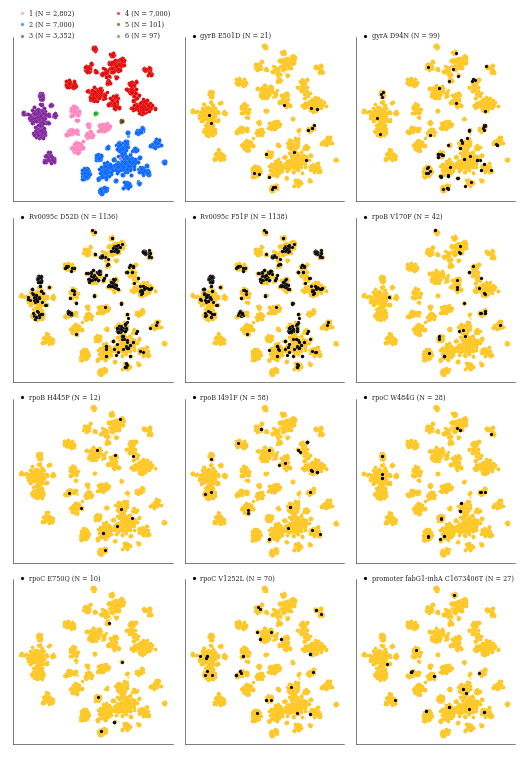

In [22]:
figS10 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=4, figure=figS10 , wspace=0.075, hspace=0.10)

figS10_ax1 = figS10.add_subplot(spec2[0, 0])
figS10_ax2 = figS10.add_subplot(spec2[0, 1])
figS10_ax3 = figS10.add_subplot(spec2[0, 2])

figS10_ax4 = figS10.add_subplot(spec2[1, 0])
figS10_ax5 = figS10.add_subplot(spec2[1, 1])
figS10_ax6 = figS10.add_subplot(spec2[1, 2])

figS10_ax7 = figS10.add_subplot(spec2[2, 0])
figS10_ax8 = figS10.add_subplot(spec2[2, 1])
figS10_ax9 = figS10.add_subplot(spec2[2, 2])

figS10_ax10 = figS10.add_subplot(spec2[3, 0])
figS10_ax11 = figS10.add_subplot(spec2[3, 1])
figS10_ax12 = figS10.add_subplot(spec2[3, 2])

################################################################################################################
circ_size = 10.5
alpha = 0.65

#Modern 
#lineage 2 (N = 7,000)
L2 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 4 (N = 7,000)
L4 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '4'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '4']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#Ancestral
#lineage 3 (N = 3,352)
L3 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 1 (N = 2,802)
L1 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '1']  , color = 'xkcd:pink' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 5 (N = 101)
L5 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 6 (N = 97)
L6 = figS10_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

figS10_ax1.spines['right'].set_visible(False)
figS10_ax1.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figS10_ax1.spines[axis].set_linewidth(0.5)

figS10_ax1.set_xticks([])
figS10_ax1.set_yticks([])

#add legend
figS10_ax1.legend((L1, L2, L3, L4, L5, L6), ('1 (N = 2,802)', '2 (N = 7,000)', '3 (N = 3,352)', '4 (N = 7,000)', '5 (N = 101)', '6 (N = 97)') , bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=2, fontsize=6.5 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)
################################################################################################################

SNP_i_index = 0
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax2)

SNP_i_index = 1
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax3)

SNP_i_index = 3
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax4)

SNP_i_index = 4
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax5)

SNP_i_index = 5
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax6)

SNP_i_index = 7
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax7)

SNP_i_index = 8
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax8)

SNP_i_index = 9
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax9)

SNP_i_index = 10
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax10)

SNP_i_index = 11
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax11)

SNP_i_index = 13
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS10 , figS10_ax12)

figS10 = plt.gcf()
figS10.set_size_inches(9.0, 13.0)
figS10.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/SNP_homoplasy_tSNE_plots/Figure 7 - figure supplement 1.tif'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()

## Supplementary Figure 11

#### SNP_indices: 14, 15, 16, 19, 20, 21, 22, 23, 24, 25

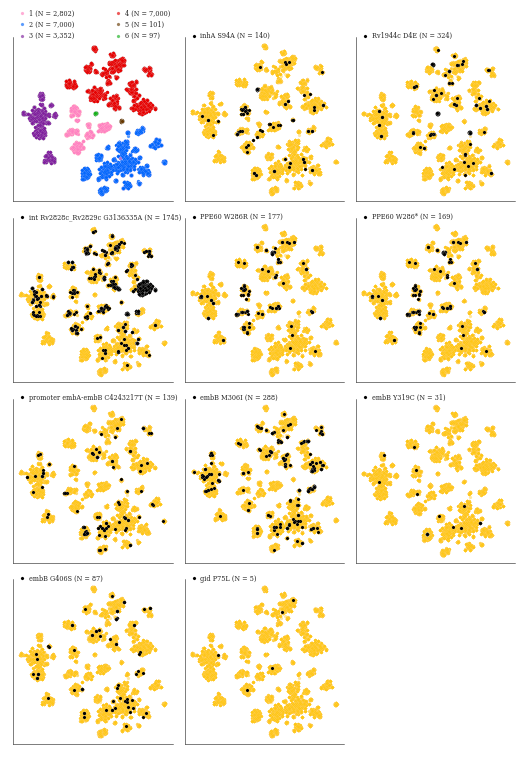

In [23]:
figS11 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=4, figure=figS11 , wspace=0.075, hspace=0.10)

figS11_ax1 = figS11.add_subplot(spec2[0, 0])
figS11_ax2 = figS11.add_subplot(spec2[0, 1])
figS11_ax3 = figS11.add_subplot(spec2[0, 2])

figS11_ax4 = figS11.add_subplot(spec2[1, 0])
figS11_ax5 = figS11.add_subplot(spec2[1, 1])
figS11_ax6 = figS11.add_subplot(spec2[1, 2])

figS11_ax7 = figS11.add_subplot(spec2[2, 0])
figS11_ax8 = figS11.add_subplot(spec2[2, 1])
figS11_ax9 = figS11.add_subplot(spec2[2, 2])

figS11_ax10 = figS11.add_subplot(spec2[3, 0])
figS11_ax11 = figS11.add_subplot(spec2[3, 1])
#figS11_ax12 = figS11.add_subplot(spec2[3, 2])

################################################################################################################
circ_size = 10.5
alpha = 0.65

#Modern 
#lineage 2 (N = 7,000)
L2 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 4 (N = 7,000)
L4 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '4'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '4']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#Ancestral
#lineage 3 (N = 3,352)
L3 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 1 (N = 2,802)
L1 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '1']  , color = 'xkcd:pink' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 5 (N = 101)
L5 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

#lineage 6 (N = 97)
L6 = figS11_ax1.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = 0.1 , alpha = alpha , s = circ_size)

figS11_ax1.spines['right'].set_visible(False)
figS11_ax1.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figS11_ax1.spines[axis].set_linewidth(0.5)

figS11_ax1.set_xticks([])
figS11_ax1.set_yticks([])

#add legend
figS11_ax1.legend((L1, L2, L3, L4, L5, L6), ('1 (N = 2,802)', '2 (N = 7,000)', '3 (N = 3,352)', '4 (N = 7,000)', '5 (N = 101)', '6 (N = 97)') , bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=2, fontsize=6.5 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)
################################################################################################################

SNP_i_index = 14
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax2)

SNP_i_index = 15
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax3)

SNP_i_index = 16
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax4)

SNP_i_index = 19
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax5)

SNP_i_index = 20
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax6)

SNP_i_index = 21
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax7)

SNP_i_index = 22
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax8)

SNP_i_index = 23
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax9)

SNP_i_index = 24
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax10)

SNP_i_index = 25
t_SNE_label_isolates_with_SNP(phy_conv_in_host_SNPs.loc[SNP_i_index , 'ref_position'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'alt_allele'] , phy_conv_in_host_SNPs.loc[SNP_i_index , 'symbol'] + ' ' + phy_conv_in_host_SNPs.loc[SNP_i_index , 'SNP_label'] , figS11 , figS11_ax11)

figS11 = plt.gcf()
figS11.set_size_inches(9.0, 13.0)
figS11.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/SNP_homoplasy_tSNE_plots/Figure 7 - figure supplement 2.tif'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()